# Import Libraries

In [12]:
import pandas as pd
import numpy as np
from PIL import Image
import pickle

from dataclasses import dataclass
@dataclass(frozen=True)
class Url:
    """Wrapper around a URL string to provide nice display in IPython environments."""
    # from: https://github.com/jupyterlab/jupyterlab/issues/7393

    __url: str

    def _repr_html_(self):
        """HTML link to this URL."""
        return f'<a href="{self.__url}">{self.__url}</a>'

    def __str__(self):
        """Return the underlying string."""
        return self.__url

# Initialize

In [13]:
def load_cards(path='./cards.pkl'):

    with open(path, 'rb') as f:
        return pickle.load(f)
        
study_questions = load_cards()
question_log = [0]

In [14]:
def new_question(topic, question, answers, images, videos=[]):
    """Question and answers for new flash card
    topic: text containing the topic
    question: text contianing the question
    answers: list containing answers to question
    images: list containing n number of image paths pertaining to question
    videos: list containing n number of links to web videos for question"""
    global study_questions
    
    get_qid = 1
    if topic in study_questions.keys():
        get_qid = len(study_questions[topic].keys()) + 1
    else:
        study_questions[topic] = {}

    answer = {
        'text': answers,
        'img': images,
        'video': videos
    }
    study_questions[topic][get_qid] = {'question': question,
                                        'answer': answer}


In [15]:
def save_cards(cards=study_questions, path='./cards.pkl'):
    
    with open(path, 'wb') as f:
        pickle.dump(study_questions, f)

In [16]:
def view_flashcard(q_id=0, topic='data_science'):
    rng = 1

    if q_id != 0:
        try:
            print(study_questions[topic][q_id]['question'])
        except:
            max_id = (len(study_questions[topic].keys()) + 1)
            print(f'Invalid question ID. Try a number between 1-{max_id}')

    else:
        rng = np.random.choice(
                range(
                    1, (len(study_questions[topic].keys()) + 1) 
                    )
                )
        q_id = rng
        print(study_questions[topic][rng]['question'])
    
    return q_id


In [17]:
def view_answer(q_id=0, topic='data_science'):
    if q_id == 0:
        q_id = question_log[-1]
    text_answers = study_questions[topic][q_id]['answer']['text']
    for answer in text_answers:
        print(answer)
    
    image_answers = study_questions[topic][q_id]['answer']['img']
    if len(image_answers) > 0:
        for image in image_answers:
            im = Image.open(image)
            display(im) 
    
    video_answers = study_questions[topic][q_id]['answer']['video']
    if len(video_answers) > 0:
        for video in video_answers:
            display(Url(video))    

In [18]:
def random_question():
    global question_log
    question_log.append(view_flashcard())

In [20]:
def reset_log():
    global question_log
    question_log = [0]
    print('Question log reset.')

# Make New Flashcard

In [ ]:
topic = 'data_science'
question = 'How is logistic regression done?'
answers = ['Logistic regression measures the relationship between the dependent variable (our label of what we want to predict) and one or more independent variables (our features) by estimating probability using its underlying logistic function (sigmoid).']
images = ['./assets/logistic_regression_map.png', './assets/logistic_regression_sigmoid.png']
videos = ['https://www.youtube.com/watch?v=yIYKR4sgzI8']

In [ ]:
new_question(topic, question, answers, images, videos)

# Flashcard Tools

In [ ]:
reset_log()

In [21]:
random_question()

How is logistic regression done?


Logistic regression measures the relationship between the dependent variable (our label of what we want to predict) and one or more independent variables (our features) by estimating probability using its underlying logistic function (sigmoid).


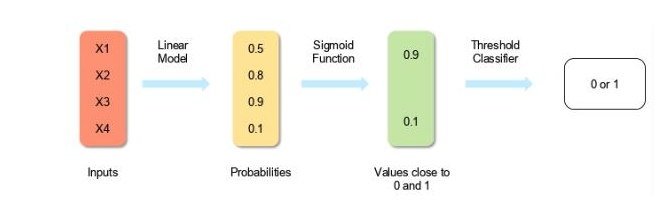

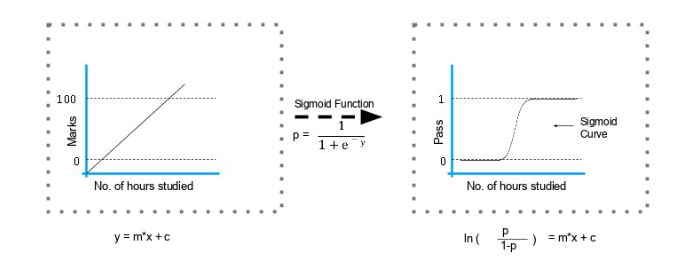

Url(_Url__url='https://www.youtube.com/watch?v=yIYKR4sgzI8')

In [22]:
view_answer()

# Export New Cards

In [171]:
save_cards(study_questions)